<a href="https://colab.research.google.com/github/shirishsriv/Capstone_Project_WBE/blob/main/World_Bank_Education_Analysis_Commented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical Documentation: Education Statistics Analysis Notebook

### Purpose:
This notebook performs data loading, cleaning, exploration, and visualization on a collection of education-related datasets from the World Bank's Education Statistics (EdStats) database. The goal is to gain insights into global education indicators.

###  Modules Used:
| Module                                 | Purpose                                               |
|:--------------------------------------|:------------------------------------------------------|
| `pandas`                               | Data manipulation and analysis                        |
| `numpy`                                | Numerical operations                                  |
| `matplotlib.pyplot`                    | Plotting and visualization                            |
| `seaborn`                              | Statistical data visualization                        |
| `os`                                   | Interacting with the operating system (e.g., file listing) |
| `mpl_toolkits.mplot3d`                 | For 3D plotting (e.g., scatter or surface plots)      |
| `sklearn.preprocessing.StandardScaler` | Standardizing features for machine learning or statistical analysis |



### Datasets Loaded:

- EdStatsData.csv
- EdStatsCountry.csv
- EdStatsFootNote.csv
- EdStatsSeries.csv
- EdStatsCountry-Series.csv


In [2]:
# Education Statistics Analysis
# --------------------------------
# This script loads and explores datasets from the World Bank's EdStats collection.
# It uses pandas for data manipulation, and seaborn/matplotlib for visualization.

# Import necessary libraries
import pandas as pd
# Import necessary libraries
import numpy as np
# Import necessary libraries
import seaborn as sns
# Import necessary libraries
import matplotlib.pyplot as plt
# Import necessary libraries
import os
# Import necessary libraries
import plotly.express as px
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
###from google.colab import files
import sys

In [3]:
# List files in the working directory to verify dataset availability
from google.colab import drive
drive.mount('/content/drive')

os.listdir('/content/drive/MyDrive/World_Edu_Project')

Mounted at /content/drive


['EdStatsCountry-Series.csv',
 'EdStatsFootNote.csv',
 'EdStatsCountry.csv',
 'EdStatsSeries.csv',
 'EdStatsData.csv',
 'World Bank Global Education Analysis.ipynb']

In [4]:
# Load datasets into pandas DataFrames
# Load data from CSV file into DataFrame
EdStatsData_df=pd.read_csv("/content/drive/MyDrive/World_Edu_Project/EdStatsData.csv")
# Load data from CSV file into DataFrame
EdStatsCountry_df=pd.read_csv("/content/drive/MyDrive/World_Edu_Project/EdStatsCountry.csv")
# Load data from CSV file into DataFrame
EdStatsFootNote_df=pd.read_csv("/content/drive/MyDrive/World_Edu_Project/EdStatsFootNote.csv")
# Load data from CSV file into DataFrame
EdStatsSeries_df=pd.read_csv("/content/drive/MyDrive/World_Edu_Project/EdStatsSeries.csv")
# Load data from CSV file into DataFrame
EdStatsCountry_Series_df=pd.read_csv('/content/drive/MyDrive/World_Edu_Project/EdStatsCountry-Series.csv')

In [5]:
# Display basic info: column names, non-null counts, and data types
# Display structure of the DataFrame
EdStatsData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [6]:
# Display structure of the DataFrame
EdStatsCountry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [7]:
# Display structure of the DataFrame
EdStatsFootNote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [8]:
# Display structure of the DataFrame
EdStatsSeries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [9]:
# Display structure of the DataFrame
EdStatsCountry_Series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [10]:
# Preview the first few rows of each dataset
# Show the first few rows of the DataFrame
EdStatsData_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Show the first few rows of the DataFrame
EdStatsCountry_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [12]:
# Show the first few rows of the DataFrame
EdStatsFootNote_df.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [13]:
# Show the first few rows of the DataFrame
EdStatsSeries_df.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Show the first few rows of the DataFrame
EdStatsCountry_Series_df.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [15]:
# Summary statistics for numerical columns in the main dataset
# Get descriptive statistics of the DataFrame
EdStatsData_df.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [16]:
# Rename long column headers for easier access in future operations
EdStatsData_df=EdStatsData_df.rename(columns={"Country Name":"Country_Name","Country Code":"Country_Code","Indicator Name":"Indicator_Name","Indicator Code":"Indicator_Code"})

In [17]:
# Replace all missing (NaN) values in the DataFrame with the string '0'
# This is often done to avoid issues during numerical operations or to standardize missing data
EdStatsData_df = EdStatsData_df.fillna('0')
  ##SE.ADT.1524.LT.FM.ZS

In [59]:
# Filter the DataFrame to include only rows where the value in the '1970' column is not equal to the string '0'
# This is likely done to exclude records with missing or zero data for the year 1970
EdStatsData_df[EdStatsData_df['1970'] != '0'].head()


,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,0,0,0,0,0,0,0,0,0,0
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.31815,44.640701,45.845718,46.449501,48.363892,...,0,0,0,0,0,0,0,0,0,0
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender parity index (GPI)",UIS.NERA.1.GPI,0.65857,0.6564,0.66329,0.67204,0.67261,0.69176,...,0,0,0,0,0,0,0,0,0,0
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,0,0,0,0,0,0,0,0,0,0
12,Arab World,ARB,"Adjusted net intake rate to Grade 1 of primary education, both sexes (%)",UIS.NIRA.1,52.448921,52.48975,52.635593,53.327,54.184654,54.865627,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Filter the DataFrame to include only rows where:
# 1. The country name is either 'Australia' or 'New Zealand'
# 2. The value in the '1970' column is not equal to the string '0'
# This is typically done to focus analysis on valid data for these two countries from the year 1970
EdStatsData_df[EdStatsData_df['Country_Name'].isin(['Australia', 'New Zealand']) & (EdStatsData_df['1970'] != '0')]


,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
128424,Australia,AUS,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP.FE,5.59,0,0,0,0,5.72,...,0,0,0,0,0,0,0,0,0,0
128425,Australia,AUS,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP,5.62,0,0,0,0,5.75,...,0,0,0,0,0,0,0,0,0,0
128426,Australia,AUS,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519.FE,5.93,0,0,0,0,5.76,...,0,0,0,0,0,0,0,0,0,0
128427,Australia,AUS,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519,5.94,0,0,0,0,5.86,...,0,0,0,0,0,0,0,0,0,0
128428,Australia,AUS,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024.FE,5.88,0,0,0,0,5.94,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611377,New Zealand,NZL,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,3.0,3.0,3.0,3.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
611484,New Zealand,NZL,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,99.89875,99.704033,99.979088,99.116211,99.243912,99.540169,...,0,0,0,0,0,0,0,0,0,0
611485,New Zealand,NZL,"Total net enrolment rate, primary, female (%)",UIS.NERT.1.F,99.792938,99.39473,100.0,99.01693,98.905777,99.064323,...,0,0,0,0,0,0,0,0,0,0
611486,New Zealand,NZL,"Total net enrolment rate, primary, gender pari...",UIS.NERT.1.GPI,0.99793,0.99395,1.00041,0.99804,0.99333,0.99064,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Filter the DataFrame to include only rows where:
# 1. The country is either 'Australia' or 'New Zealand'
# 2. The indicator code is exactly 'UIS.NERT.1', which typically refers to the Net Enrolment Rate in primary education (total)
# This filtered dataset is stored in a new DataFrame named EdStatsDataAUS_NZ_df
EdStatsDataAUS_NZ_df = EdStatsData_df[
    (EdStatsData_df['Country_Name'].isin(['Australia', 'New Zealand'])) &
    (EdStatsData_df['Indicator_Code'] == "UIS.NERT.1")
]


In [ ]:
# Transform the wide-format DataFrame into a long-format DataFrame using `melt`
# This reshapes the DataFrame so that year columns (e.g., '1970', '1971', ..., '2020') become row values under the column 'Year',
# and their corresponding data becomes values under the column 'Value'
# The columns 'Country_Name', 'Country_Code', 'Indicator_Name', and 'Indicator_Code' are kept fixed (as identifier variables)
EdStatsDataAUS_NZ_df_Transpose = EdStatsDataAUS_NZ_df.melt(
    ['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code'],
    var_name='Year',
    value_name='Value'
)


In [ ]:
EdStatsDataAUS_NZ_df_Transpose

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,Year,Value
0,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1970,0
1,New Zealand,NZL,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1970,99.89875
2,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1971,96.201088
3,New Zealand,NZL,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1971,99.704033
4,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1972,0
...,...,...,...,...,...,...
127,New Zealand,NZL,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,2095,0
128,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,2100,0
129,New Zealand,NZL,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,2100,0
130,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,Unnamed: 69,0


In [ ]:
# Remove any rows where the 'Year' column has the value 'Unnamed: 69'
# This likely results from a malformed or extra column in the original dataset, commonly seen in Excel exports
EdStatsDataAUS_NZ_df_Transpose = EdStatsDataAUS_NZ_df_Transpose[
    EdStatsDataAUS_NZ_df_Transpose['Year'] != 'Unnamed: 69'
]

# Convert the 'Year' and 'Value' columns to numeric types
# This ensures that both columns can be used for numerical comparisons and plotting
EdStatsDataAUS_NZ_df_Transpose[['Year', 'Value']] = EdStatsDataAUS_NZ_df_Transpose[['Year', 'Value']].apply(pd.to_numeric)

# Filter the DataFrame to include only rows where the year is between 1991 and 2000 (inclusive of 1991 and 2000)
# This prepares a subset of the data for focused analysis on that decade
EdStatsDataAUS_NZ_1990_2000 = EdStatsDataAUS_NZ_df_Transpose[
    (EdStatsDataAUS_NZ_df_Transpose['Year'] > 1990) &
    (EdStatsDataAUS_NZ_df_Transpose['Year'] < 2001)
]


/tmp/ipython-input-23-232246510.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EdStatsDataAUS_NZ_df_Transpose[['Year', 'Value']] = EdStatsDataAUS_NZ_df_Transpose[['Year', 'Value']].apply(pd.to_numeric)


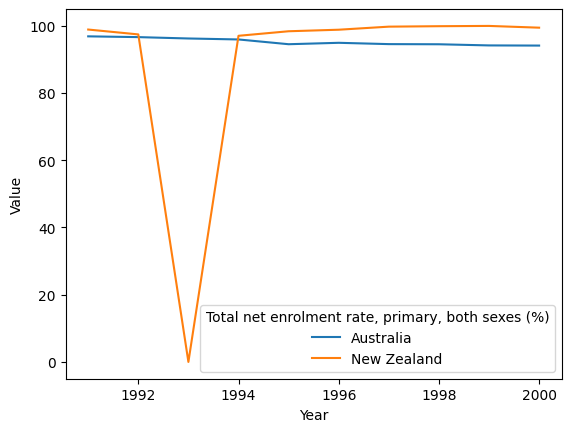

In [ ]:
# Create a line plot using Seaborn to visualize the total net enrolment rate over time (1991–2000)
# x-axis: 'Year'
# y-axis: 'Value' (Net enrolment rate)
# hue: 'Country_Name' – separate lines for Australia and New Zealand
# data: EdStatsDataAUS_NZ_1990_2000 – the filtered dataset
sns.lineplot(x='Year', y='Value', hue='Country_Name', data=EdStatsDataAUS_NZ_1990_2000)

# Customize the legend:
# Title: Describes the indicator being plotted
# Location: Place the legend in the bottom right corner of the plot
plt.legend(title='Total net enrolment rate, primary, both sexes (%)', loc='lower right')


* We can see there is dip in the total enrolment in primary across genders in
New Zealand between year 1992 and 1994,while in Australia enrolment has largely been consistent.

In [ ]:
EdStatsDataAUS_NZ_1990_2000

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,Year,Value
42,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1991,96.869911
43,New Zealand,NZL,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1991,98.894501
44,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1992,96.640617
45,New Zealand,NZL,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1992,97.447952
46,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1993,96.234268
47,New Zealand,NZL,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1993,0.000000
48,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1994,95.944427
49,New Zealand,NZL,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1994,97.033760
50,Australia,AUS,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1995,94.528442
51,New Zealand,NZL,"Total net enrolment rate, primary, both sexes (%)",UIS.NERT.1,1995,98.385643


In [60]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', True)

EdStatsData_df=EdStatsData_df[EdStatsData_df['1970'] != '0']

EdStatsData_df[['Indicator_Name','Indicator_Code']].head(1000)

,Indicator_Name,Indicator_Code
4,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR
5,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE
6,"Adjusted net enrolment rate, primary, gender parity index (GPI)",UIS.NERA.1.GPI
7,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA
12,"Adjusted net intake rate to Grade 1 of primary education, both sexes (%)",UIS.NIRA.1
13,"Adjusted net intake rate to Grade 1 of primary education, female (%)",UIS.NIRA.1.F
14,"Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)",UIS.NIRA.1.GPI
15,"Adjusted net intake rate to Grade 1 of primary education, male (%)",UIS.NIRA.1.M
520,"Cumulative drop-out rate to the last grade of primary education, both sexes (%)",SE.PRM.DROP.ZS
703,"Early school leavers from primary education, both sexes (number)",UIS.ESL.1.T


In [90]:
# Filter the dataset to extract rows where:
# 1. The countries included for analysis are 8 countries ["India", "United States", "United Kingdom", "Australia", "Germany","South Africa", "Canada", "Japan", "Sri Lanka"]
# 2. The indicator code is 'NY.GDP.MKTP.CD', which stands for:
#    "GDP at market prices (constant 2005 US$)"
# This subset (EdStatsData_Countries_df) is useful for comparing male primary school graduation rates
# between India and Germany across multiple years.
# Countries included for below analysis

Countries = ["India", "United States", "United Kingdom", "Australia", "Germany",
             "South Africa", "Canada", "Japan", "Sri Lanka"]

EdStatsData_Countries_df = EdStatsData_df[
    (EdStatsData_df['Country_Name'].isin(Countries)) &
    (EdStatsData_df['Indicator_Code'] == "NY.GDP.MKTP.KD")
]

In [91]:
# Show the first few rows of the DataFrame
EdStatsData_Countries_df.head(10)

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
129517,Australia,AUS,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,325434740766.851013,338462896934.325989,351702827324.153015,360844684021.890015,375627656360.080017,380634257632.03302,...,0,0,0,0,0,0,0,0,0,0
221142,Canada,CAN,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,525193392687.614014,546819058425.724976,576598034629.894043,616753491791.130005,639517786995.776978,651176024410.999023,...,0,0,0,0,0,0,0,0,0,0
356747,Germany,DEU,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1534052735466.26001,1582110001731.5,1650146131454.139893,1728981646933.219971,1744370771473.919922,1729251631520.840088,...,0,0,0,0,0,0,0,0,0,0
415387,India,IND,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,202087923013.605988,205408086902.518005,204271561263.101013,211003373736.888,213504473235.811005,233039944685.957001,...,0,0,0,0,0,0,0,0,0,0
448372,Japan,JPN,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1923647559896.840088,2014039605656.76001,2183491779618.050049,2358882939753.560059,2329980966491.459961,2402014096904.330078,...,0,0,0,0,0,0,0,0,0,0
737907,South Africa,ZAF,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,137736882357.760986,143630602824.287994,146007347518.505005,152682800251.290985,162013329327.251007,164760181366.256012,...,0,0,0,0,0,0,0,0,0,0
748902,Sri Lanka,LKA,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,8887840752.84462,9003996423.280519,8967036826.767019,9599876388.25626,9969071394.64642,10579799952.239599,...,0,0,0,0,0,0,0,0,0,0
844192,United Kingdom,GBR,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,995280519872.708984,1033058969027.069946,1077500607187.060059,1147632113254.689941,1119361227100.0,1102805184368.560059,...,0,0,0,0,0,0,0,0,0,0
847857,United States,USA,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,4779684394200.0,4937197781100.0,5197055474100.0,5490331802900.0,5461938301500.0,5451141221800.0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Reshape the DataFrame from wide format to long format using the `melt` function.
# The columns 'Country_Name', 'Country_Code', 'Indicator_Name', and 'Indicator_Code' are kept as identifiers.
# All other year columns (e.g., '1970', '1971', ..., '2020') are unpivoted into two columns:
#   - 'Year': the name of the former column (e.g., '1970')
#   - 'Value': the corresponding cell value (e.g., graduation rate)
# This transformation is essential for time-series plotting and analysis.
EdStatsData_Countries_df_Transpose = EdStatsData_Countries_df.melt(
    ['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code'],
    var_name='Year',
    value_name='Value'
)


In [93]:
EdStatsData_Countries_df

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
129517,Australia,AUS,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,325434740766.851013,338462896934.325989,351702827324.153015,360844684021.890015,375627656360.080017,380634257632.03302,...,0,0,0,0,0,0,0,0,0,0
221142,Canada,CAN,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,525193392687.614014,546819058425.724976,576598034629.894043,616753491791.130005,639517786995.776978,651176024410.999023,...,0,0,0,0,0,0,0,0,0,0
356747,Germany,DEU,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1534052735466.26001,1582110001731.5,1650146131454.139893,1728981646933.219971,1744370771473.919922,1729251631520.840088,...,0,0,0,0,0,0,0,0,0,0
415387,India,IND,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,202087923013.605988,205408086902.518005,204271561263.101013,211003373736.888,213504473235.811005,233039944685.957001,...,0,0,0,0,0,0,0,0,0,0
448372,Japan,JPN,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1923647559896.840088,2014039605656.76001,2183491779618.050049,2358882939753.560059,2329980966491.459961,2402014096904.330078,...,0,0,0,0,0,0,0,0,0,0
737907,South Africa,ZAF,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,137736882357.760986,143630602824.287994,146007347518.505005,152682800251.290985,162013329327.251007,164760181366.256012,...,0,0,0,0,0,0,0,0,0,0
748902,Sri Lanka,LKA,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,8887840752.84462,9003996423.280519,8967036826.767019,9599876388.25626,9969071394.64642,10579799952.239599,...,0,0,0,0,0,0,0,0,0,0
844192,United Kingdom,GBR,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,995280519872.708984,1033058969027.069946,1077500607187.060059,1147632113254.689941,1119361227100.0,1102805184368.560059,...,0,0,0,0,0,0,0,0,0,0
847857,United States,USA,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,4779684394200.0,4937197781100.0,5197055474100.0,5490331802900.0,5461938301500.0,5451141221800.0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# Remove any rows where the 'Year' column has the placeholder or invalid entry 'Unnamed: 69'.
# This value likely came from extra unnamed columns in the CSV file and should not be included in the analysis.
EdStatsData_Countries_df_Transpose = EdStatsData_Countries_df_Transpose[
   EdStatsData_Countries_df_Transpose['Year'] != 'Unnamed: 69'
]

# Convert both 'Year' and 'Value' columns from strings to numeric types.
# This is necessary for performing numerical operations and filtering based on year range.
EdStatsData_Countries_df_Transpose[['Year', 'Value']] = EdStatsData_Countries_df_Transpose[['Year', 'Value']].apply(pd.to_numeric)

# Filter the transposed DataFrame to include only the data between 1991 and 2000 (exclusive of 1990 and inclusive of 2000).
# Note: There is a small issue here — it mistakenly references 'EdStatsDataAUS_NZ_df_Transpose' instead of using
# 'EdStatsDataIND_DEU_df_Transpose' in the first condition. That should be corrected.
EdStatsData_Countries_1990_2000 = EdStatsData_Countries_df_Transpose[
    (EdStatsData_Countries_df_Transpose['Year'] > 1990) &
    (EdStatsData_Countries_df_Transpose['Year'] < 2001)
]

/tmp/ipython-input-94-99821280.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EdStatsData_Countries_df_Transpose[['Year', 'Value']] = EdStatsData_Countries_df_Transpose[['Year', 'Value']].apply(pd.to_numeric)


In [95]:
EdStatsData_Countries_1990_2000[['Indicator_Name',"Indicator_Code"]].value_counts()

,,count
Indicator_Name,Indicator_Code,
GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,90


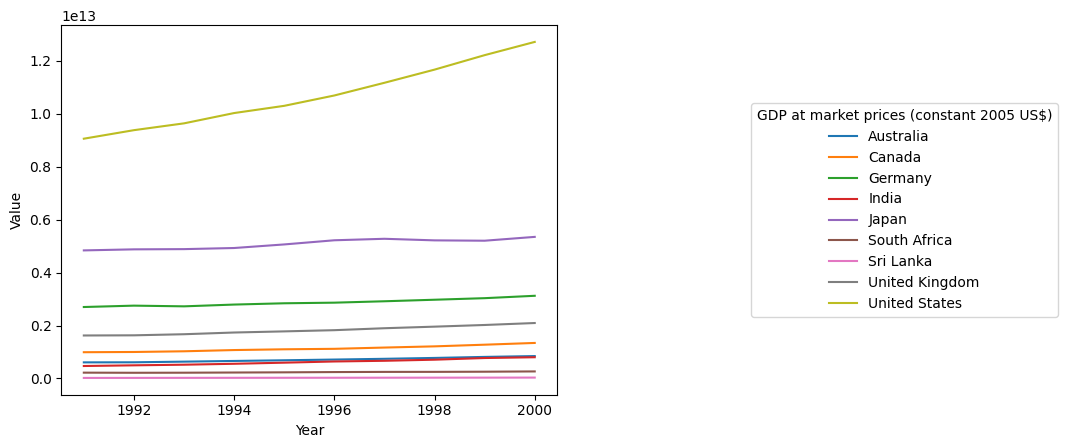

In [105]:
# Plot a line chart to visualize the primary school graduation rate (male) from 1991 to 2000
# for India and Germany using Seaborn's `lineplot`.
# - x-axis: 'Year'
# - y-axis: 'Value' (graduation rate)
# - hue: 'Country_Name' to draw separate lines for each country
plt.subplots()

sns.lineplot(x='Year', y='Value', hue='Country_Name', data=EdStatsData_Countries_1990_2000)

# Add a legend with a title representing the indicator code for male graduation rates (SP.PRM.GRAD.MA).
# The legend is positioned at the center of the plot.
plt.legend(title='GDP at market prices (constant 2005 US$)',  bbox_to_anchor=(1.7,0.5),loc='center')



From above plot,we can deduce the following points.

* US has the highest gdp among all countries in year 2005.
* Japan has the second highest gdp after US among all countries in 2005.
* Germany is at the third position in terms of total GDP in 2005.
* India GDP in 2005 was close to Australia.

In [ ]:
# Filter the dataset to extract rows where:
# 1. The countries included for analysis are 8 countries ["India", "United States", "United Kingdom", "Australia", "Germany","South Africa", "Canada", "Japan", "Sri Lanka"]
# 2. The indicator code is 'SP.PRM.GRAD.MA', which stands for:
#    "Primary school graduation rate, male (%)"
# This subset (EdStatsData_Countries_df) is useful for comparing male primary school graduation rates
# between India and Germany across multiple years.
# Countries included for below analysis

Countries = ["India", "United States", "United Kingdom", "Australia", "Germany",
             "South Africa", "Canada", "Japan", "Sri Lanka"]

EdStatsData_Countries_df = EdStatsData_df[
    (EdStatsData_df['Country_Name'].isin(Countries)) &
    (EdStatsData_df['Indicator_Code'] == "SP.PRM.GRAD.MA")
]


In [ ]:
# Show the first few rows of the DataFrame
EdStatsData_Countries_df.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
130606,Australia,AUS,Population of the official age for the last gr...,SP.PRM.GRAD.MA,129887.0,129978.0,130620.0,131793.0,132838.0,132957.0,131418.0,130419.0,129441.0,129072.0,130429.0,133103.0,135216.0,137587.0,138998.0,137264.0,132983.0,129710.0,126494.0,124184.0,124744.0,127503.0,129540.0,131455.0,133185.0,133978.0,133903.0,134481.0,135384.0,136667.0,138737.0,140974.0,142849.0,144722.0,146165.0,146287.0,144961.0,144087.0,143523.0,143062.0,142519.0,142297.0,142188.0,141789.0,142115.0,144598.0,150192.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
222231,Canada,CAN,Population of the official age for the last gr...,SP.PRM.GRAD.MA,234253.0,237626.0,240672.0,242463.0,243825.0,242836.0,236744.0,227217.0,217940.0,207919.0,198837.0,193890.0,192695.0,190677.0,188464.0,186915.0,186217.0,187311.0,188487.0,189546.0,190674.0,192305.0,196028.0,199082.0,201651.0,203690.0,205070.0,206526.0,207624.0,207995.0,208345.0,209862.0,213439.0,215656.0,217176.0,217206.0,214320.0,209581.0,204965.0,200111.0,195663.0,192862.0,192872.0,191611.0,188745.0,186415.0,187305.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
357836,Germany,DEU,Population of the official age for the last gr...,SP.PRM.GRAD.MA,622330.0,638445.0,651253.0,661276.0,667073.0,667577.0,663111.0,658167.0,645191.0,616634.0,571527.0,522668.0,478281.0,437483.0,411250.0,403562.0,402799.0,399622.0,400215.0,404328.0,411640.0,421281.0,434284.0,447895.0,459683.0,467948.0,473467.0,477869.0,478512.0,471974.0,457878.0,441892.0,429014.0,417008.0,410073.0,409422.0,409937.0,407618.0,404668.0,399330.0,391264.0,382961.0,375673.0,368796.0,362917.0,358220.0,354245.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
416476,India,IND,Population of the official age for the last gr...,SP.PRM.GRAD.MA,6988600.0,7138884.0,7292709.0,7456250.0,7620918.0,7767050.0,7886185.0,8022944.0,8174923.0,8336332.0,8504473.0,8673034.0,8858851.0,9054879.0,9250781.0,9428558.0,9582433.0,9754607.0,9941316.0,10147005.0,10389983.0,10665317.0,10938353.0,11208453.0,11459610.0,11654612.0,11783488.0,11924489.0,12064919.0,12193611.0,12305371.0,12397536.0,12489740.0,12577527.0,12663625.0,12755131.0,12851046.0,12945089.0,13033940.0,13118224.0,13197717.0,13269563.0,13335849.0,13392171.0,13433808.0,13452040.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
449461,Japan,JPN,Population of the official age for the last gr...,SP.PRM.GRAD.MA,791470.0,791680.0,801587.0,812321.0,826342.0,841861.0,853653.0,861228.0,872658.0,883025.0,898194.0,928857.0,972687.0,1006943.0,1038891.0,1056064.0,1037529.0,990857.0,947808.0,902246.0,859562.0,833829.0,822100.0,804871.0,785347.0,765409.0,743971.0,723600.0,703810.0,684444.0,666545.0,651889.0,640748.0,630320.0,620279.0,612173.0,607828.0,607501.0,607899.0,609815.0,610621.0,605796.0,596557.0,588391.0,580190.0,572394.0,566853.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Reshape the DataFrame from wide format to long format using the `melt` function.
# The columns 'Country_Name', 'Country_Code', 'Indicator_Name', and 'Indicator_Code' are kept as identifiers.
# All other year columns (e.g., '1970', '1971', ..., '2020') are unpivoted into two columns:
#   - 'Year': the name of the former column (e.g., '1970')
#   - 'Value': the corresponding cell value (e.g., graduation rate)
# This transformation is essential for time-series plotting and analysis.
EdStatsData_Countries_df_Transpose = EdStatsData_Countries_df.melt(
    ['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code'],
    var_name='Year',
    value_name='Value'
)


In [ ]:
EdStatsData_Countries_df

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
130606,Australia,AUS,Population of the official age for the last gr...,SP.PRM.GRAD.MA,129887.0,129978.0,130620.0,131793.0,132838.0,132957.0,131418.0,130419.0,129441.0,129072.0,130429.0,133103.0,135216.0,137587.0,138998.0,137264.0,132983.0,129710.0,126494.0,124184.0,124744.0,127503.0,129540.0,131455.0,133185.0,133978.0,133903.0,134481.0,135384.0,136667.0,138737.0,140974.0,142849.0,144722.0,146165.0,146287.0,144961.0,144087.0,143523.0,143062.0,142519.0,142297.0,142188.0,141789.0,142115.0,144598.0,150192.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
222231,Canada,CAN,Population of the official age for the last gr...,SP.PRM.GRAD.MA,234253.0,237626.0,240672.0,242463.0,243825.0,242836.0,236744.0,227217.0,217940.0,207919.0,198837.0,193890.0,192695.0,190677.0,188464.0,186915.0,186217.0,187311.0,188487.0,189546.0,190674.0,192305.0,196028.0,199082.0,201651.0,203690.0,205070.0,206526.0,207624.0,207995.0,208345.0,209862.0,213439.0,215656.0,217176.0,217206.0,214320.0,209581.0,204965.0,200111.0,195663.0,192862.0,192872.0,191611.0,188745.0,186415.0,187305.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
357836,Germany,DEU,Population of the official age for the last gr...,SP.PRM.GRAD.MA,622330.0,638445.0,651253.0,661276.0,667073.0,667577.0,663111.0,658167.0,645191.0,616634.0,571527.0,522668.0,478281.0,437483.0,411250.0,403562.0,402799.0,399622.0,400215.0,404328.0,411640.0,421281.0,434284.0,447895.0,459683.0,467948.0,473467.0,477869.0,478512.0,471974.0,457878.0,441892.0,429014.0,417008.0,410073.0,409422.0,409937.0,407618.0,404668.0,399330.0,391264.0,382961.0,375673.0,368796.0,362917.0,358220.0,354245.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
416476,India,IND,Population of the official age for the last gr...,SP.PRM.GRAD.MA,6988600.0,7138884.0,7292709.0,7456250.0,7620918.0,7767050.0,7886185.0,8022944.0,8174923.0,8336332.0,8504473.0,8673034.0,8858851.0,9054879.0,9250781.0,9428558.0,9582433.0,9754607.0,9941316.0,10147005.0,10389983.0,10665317.0,10938353.0,11208453.0,11459610.0,11654612.0,11783488.0,11924489.0,12064919.0,12193611.0,12305371.0,12397536.0,12489740.0,12577527.0,12663625.0,12755131.0,12851046.0,12945089.0,13033940.0,13118224.0,13197717.0,13269563.0,13335849.0,13392171.0,13433808.0,13452040.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
449461,Japan,JPN,Population of the official age for the last gr...,SP.PRM.GRAD.MA,791470.0,791680.0,801587.0,812321.0,826342.0,841861.0,853653.0,861228.0,872658.0,883025.0,898194.0,928857.0,972687.0,1006943.0,1038891.0,1056064.0,1037529.0,990857.0,947808.0,902246.0,859562.0,833829.0,822100.0,804871.0,785347.0,765409.0,743971.0,723600.0,703810.0,684444.0,666545.0,651889.0,640748.0,630320.0,620279.0,612173.0,607828.0,607501.0,607899.0,609815.0,610621.0,605796.0,596557.0,588391.0,580190.0,572394.0,566853.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
738996,South Africa,ZAF,Population of the official age for the last gr...,SP.PRM.GRAD.MA,276109.0,282242.0,288257.0,294726.0,301262.0,308131.0,315944.0,324704.0,333749.0,343061.0,352799.0,362895.0,373301.0,383730.0,394318.0,403699.0,410736.0,416618.0,422945.0,429446.0,437306.0,446399.0,457221.0,467513.0,476556.0,483076.0,486506.0,481212.0,485832.0,494760.0,510173.0,523842.0,531207.0,533853.0,534992.0,530368.0,531892.0,540874.0,554626.0,566211.0,581488.0,584001.0,570832.0,548263.0,527271.0,501307.0,489820.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
749991,Sri Lanka,LKA,Population of the official age for the last gr...,SP.PRM.GRAD.MA,163494.0,164444.0,165416.0,166521.0,168452.0,171257.0,173914.0,176243.0,177944.0,178135.0,176757.0,175760.0,174845.0,174551.0,176272.0,180211.0,183735.0,190461.0,193077.0,194805.

In [ ]:
# Remove any rows where the 'Year' column has the placeholder or invalid entry 'Unnamed: 69'.
# This value likely came from extra unnamed columns in the CSV file and should not be included in the analysis.
EdStatsData_Countries_df_Transpose = EdStatsData_Countries_df_Transpose[
   EdStatsData_Countries_df_Transpose['Year'] != 'Unnamed: 69'
]

# Convert both 'Year' and 'Value' columns from strings to numeric types.
# This is necessary for performing numerical operations and filtering based on year range.
EdStatsData_Countries_df_Transpose[['Year', 'Value']] = EdStatsData_Countries_df_Transpose[['Year', 'Value']].apply(pd.to_numeric)

# Filter the transposed DataFrame to include only the data between 1991 and 2000 (exclusive of 1990 and inclusive of 2000).
# Note: There is a small issue here — it mistakenly references 'EdStatsDataAUS_NZ_df_Transpose' instead of using
# 'EdStatsDataIND_DEU_df_Transpose' in the first condition. That should be corrected.
EdStatsData_Countries_1990_2000 = EdStatsData_Countries_df_Transpose[
    (EdStatsData_Countries_df_Transpose['Year'] > 1990) &
    (EdStatsData_Countries_df_Transpose['Year'] < 2001)
]


/tmp/ipython-input-78-1863770301.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EdStatsData_Countries_df_Transpose[['Year', 'Value']] = EdStatsData_Countries_df_Transpose[['Year', 'Value']].apply(pd.to_numeric)


In [ ]:
EdStatsData_Countries_1990_2000[['Indicator_Name',"Indicator_Code"]].value_counts()

,,count
Indicator_Name,Indicator_Code,
"Population of the official age for the last grade of primary education, male (number)",SP.PRM.GRAD.MA,90


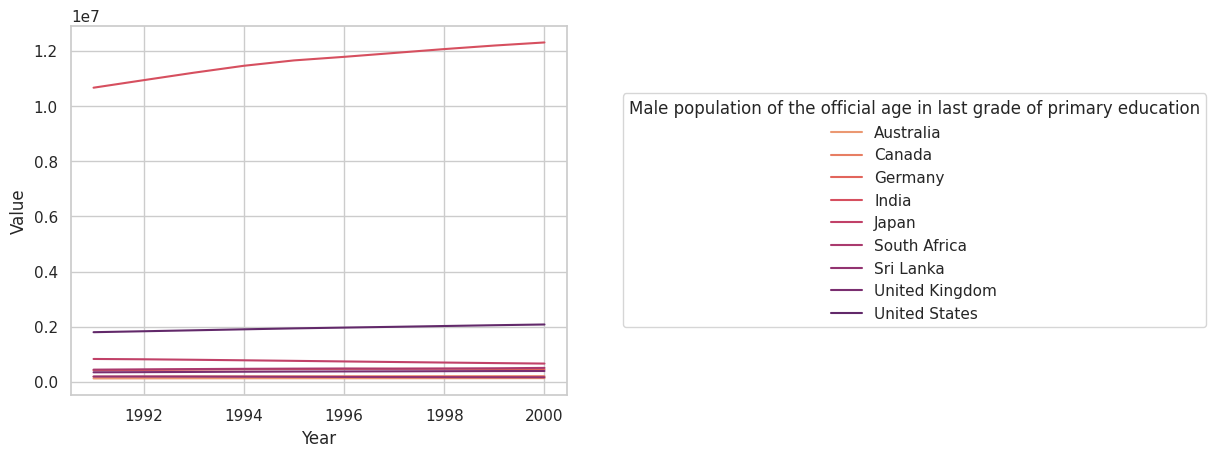

In [ ]:
# Plot a line chart to visualize the primary school graduation rate (male) from 1991 to 2000
# for India and Germany using Seaborn's `lineplot`.
# - x-axis: 'Year'
# - y-axis: 'Value' (graduation rate)
# - hue: 'Country_Name' to draw separate lines for each country
sns.lineplot(x='Year', y='Value', hue='Country_Name', data=EdStatsData_Countries_1990_2000,palette="flare")

# Add a legend with a title representing the indicator code for male graduation rates (SP.PRM.GRAD.MA).
# The legend is positioned at the center of the plot.
plt.legend(title='Male population of the official age in last grade of primary education',  bbox_to_anchor=(1.7,0.5),loc='center')


* Clearly,India has highest population of official age in last grade of primary education than any other country taken into consideration,which can be attributed India's large population.

* After India,US has highest population of official age in last grade of primary education,again which can be attributed to its large population.

In [ ]:
##HH.DHS.YRS.1519.Q5
EdStatsData_df[(EdStatsData_df["Indicator_Code"]=='UIS.DR.1.G5.M')&(EdStatsData_df['1970'] != '0')&(EdStatsData_df["Country_Code"].isin(["CHL","NZL","PAN","PRY"]))]

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
238923,Chile,CHL,Drop-out rate from Grade 5 of primary educatio...,UIS.DR.1.G5.M,12.5702,11.88098,10.10554,6.92848,10.04946,11.42117,0,7.27158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.81628,0,0,0,0,0,0,0,0,0,0,0,0,0,0.11105,0,0.19665,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
609088,New Zealand,NZL,Drop-out rate from Grade 5 of primary educatio...,UIS.DR.1.G5.M,2.01743,2.44682,1.3812,0.98761,1.66743,0,0.42377,0,2.36294,1.64142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
642073,Panama,PAN,Drop-out rate from Grade 5 of primary educatio...,UIS.DR.1.G5.M,9.38953,7.92299,11.07042,9.46024,0,16.618641,3.07865,2.41243,5.49877,0.99625,4.86597,1.82702,6.5318,3.18515,5.87913,2.66682,4.48929,3.79371,4.60402,3.83366,0,0,0,0,0,0,0,0,0,1.81385,2.87069,2.39618,0,0,3.27948,2.90256,2.08585,2.41787,2.46886,1.05993,1.50061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
649403,Paraguay,PRY,Drop-out rate from Grade 5 of primary educatio...,UIS.DR.1.G5.M,20.38871,0,20.376591,20.8022,18.8172,19.62565,19.66921,18.33198,20.252029,0,16.452,16.750031,14.80375,16.24181,16.67732,14.54301,16.83742,14.29951,15.52547,16.298429,16.669821,17.45594,15.78519,15.35857,13.75766,14.92431,9.60269,0,6.04746,6.31887,0,0,6.40601,6.03553,4.68635,6.21332,5.76475,5.88089,5.72691,3.66811,4.8481,3.32417,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
EdStatsData_S_df=EdStatsData_df[(EdStatsData_df["Indicator_Code"]=='UIS.DR.1.G5.M')&(EdStatsData_df['1970'] != '0')&(EdStatsData_df["Country_Code"].isin(["CHL","NZL","PAN","PRY"]))]

In [ ]:
EdStatsData_S_Transpose_df=EdStatsData_S_df.melt(['Country_Name','Country_Code','Indicator_Name','Indicator_Code'],var_name='Year',value_name='Value')

In [ ]:

EdStatsData_S_Transpose_df=EdStatsData_S_Transpose_df[EdStatsData_S_Transpose_df['Year']!='Unnamed: 69']

EdStatsData_S_Transpose_df[['Year','Value']]=EdStatsData_S_Transpose_df[['Year','Value']].apply(pd.to_numeric)

EdStatsData_S_Transpose_df=EdStatsData_S_Transpose_df[(EdStatsData_S_Transpose_df['Year']>1990)&(EdStatsData_S_Transpose_df['Year']<2000)]


/tmp/ipython-input-44-4226742576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EdStatsData_S_Transpose_df[['Year','Value']]=EdStatsData_S_Transpose_df[['Year','Value']].apply(pd.to_numeric)


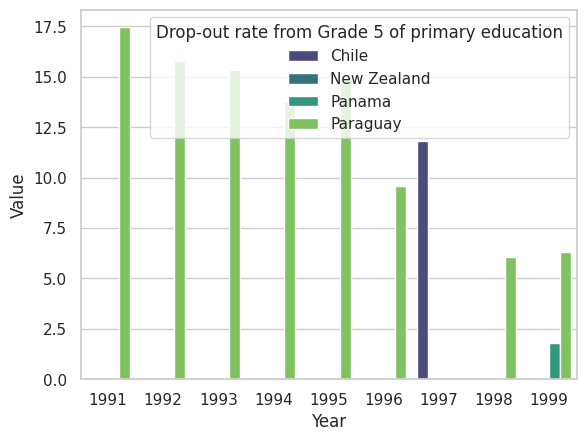

In [ ]:
##sns.set(style='darkgrid', rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgray'})

##custom_palette = sns.blend_palette(["#090364", "#091e75"])

sns.set(style='whitegrid',palette="viridis")

sns.barplot(x='Year',y='Value',hue='Country_Name',palette="viridis",data=EdStatsData_S_Transpose_df)

plt.legend(title="Drop-out rate from Grade 5 of primary education",loc="upper right")

* Paraguay has maximum number of 5th Grade drop out between years 1991 and 1999,while NZ has none.

In [ ]:
EdStatsData_df['Indicator_Code'].value_counts()

,count
Indicator_Code,
SE.ADT.1524.LT.MA.ZS,242
PRJ.POP.ALL.4.FE,242
PRJ.POP.ALL.NED.MF,242
PRJ.POP.ALL.NED.MA,242
PRJ.POP.ALL.NED.FE,242
PRJ.POP.ALL.2.MF,242
PRJ.POP.ALL.2.MA,242
PRJ.POP.ALL.2.FE,242
PRJ.POP.ALL.S1.MF,242


In [ ]:
# Show the first few rows of the DataFrame
EdStatsCountry_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


/tmp/ipython-input-60-4287509815.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=EdStatsCountry_df, y='Income Group', order=EdStatsCountry_df['Income Group'].value_counts().index, palette='magma')


Text(0.5, 1.0, 'Number of Countries by Income Group')

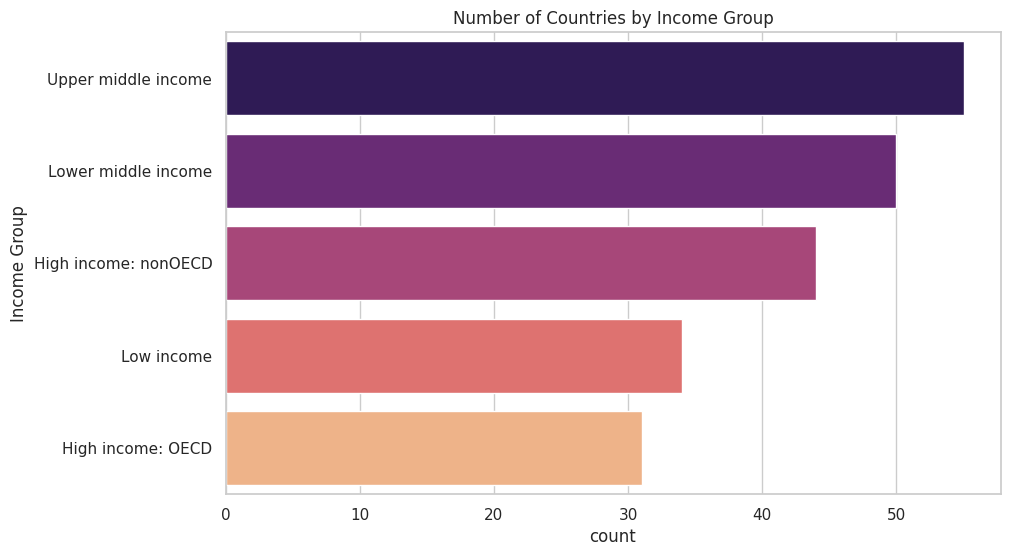

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(10,6))

##palette = ['viridis']

sns.countplot(data=EdStatsCountry_df, y='Income Group', order=EdStatsCountry_df['Income Group'].value_counts().index, palette='magma')



##sns.countplot(y='Income Group',x='Count',width=0.4,palette=palette,data=EdStatsCountry_Income_Group)

plt.title('Number of Countries by Income Group')








* Above plot shows the distribution of different income group countries in the dataset.

<ipython-input-43-2253761567>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=EdStatsCountry_df, y='Region', order=EdStatsCountry_df['Region'].value_counts().index, palette='viridis')


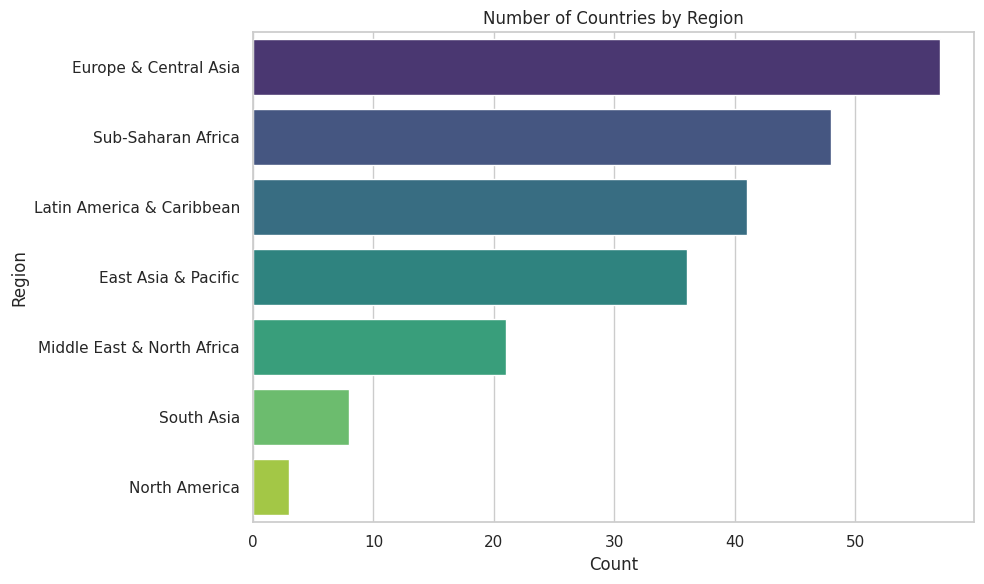

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=EdStatsCountry_df, y='Region', order=EdStatsCountry_df['Region'].value_counts().index, palette='viridis')
plt.title('Number of Countries by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

* This plot shows the distribution of countries across regions in the dataset.

In [ ]:
EdStatsSeries_df=EdStatsSeries_df.fillna(0)

In [ ]:
EdStatsSeries_topicwise_df=EdStatsSeries_df.groupby("Topic")["Series Code"].count()
EdStatsSeries_topicwise_df=EdStatsSeries_topicwise_df.reset_index()
EdStatsSeries_topicwise_df=EdStatsSeries_topicwise_df.rename(columns={"Series Code":"Series_Code_Count"})
EdStatsSeries_topicwise_df.sort_values(by="Series_Code_Count",ascending=False)

,Topic,Series_Code_Count
19,Learning Outcomes,1046
0,Attainment,733
9,Education Equality,426
28,Secondary,256
24,Primary,248
21,Population,213
34,Tertiary,158
32,Teachers,137
12,Expenditures,93
11,Engaging the Private Sector (SABER),51


<ipython-input-46-750770562>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
<ipython-input-46-750770562>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping


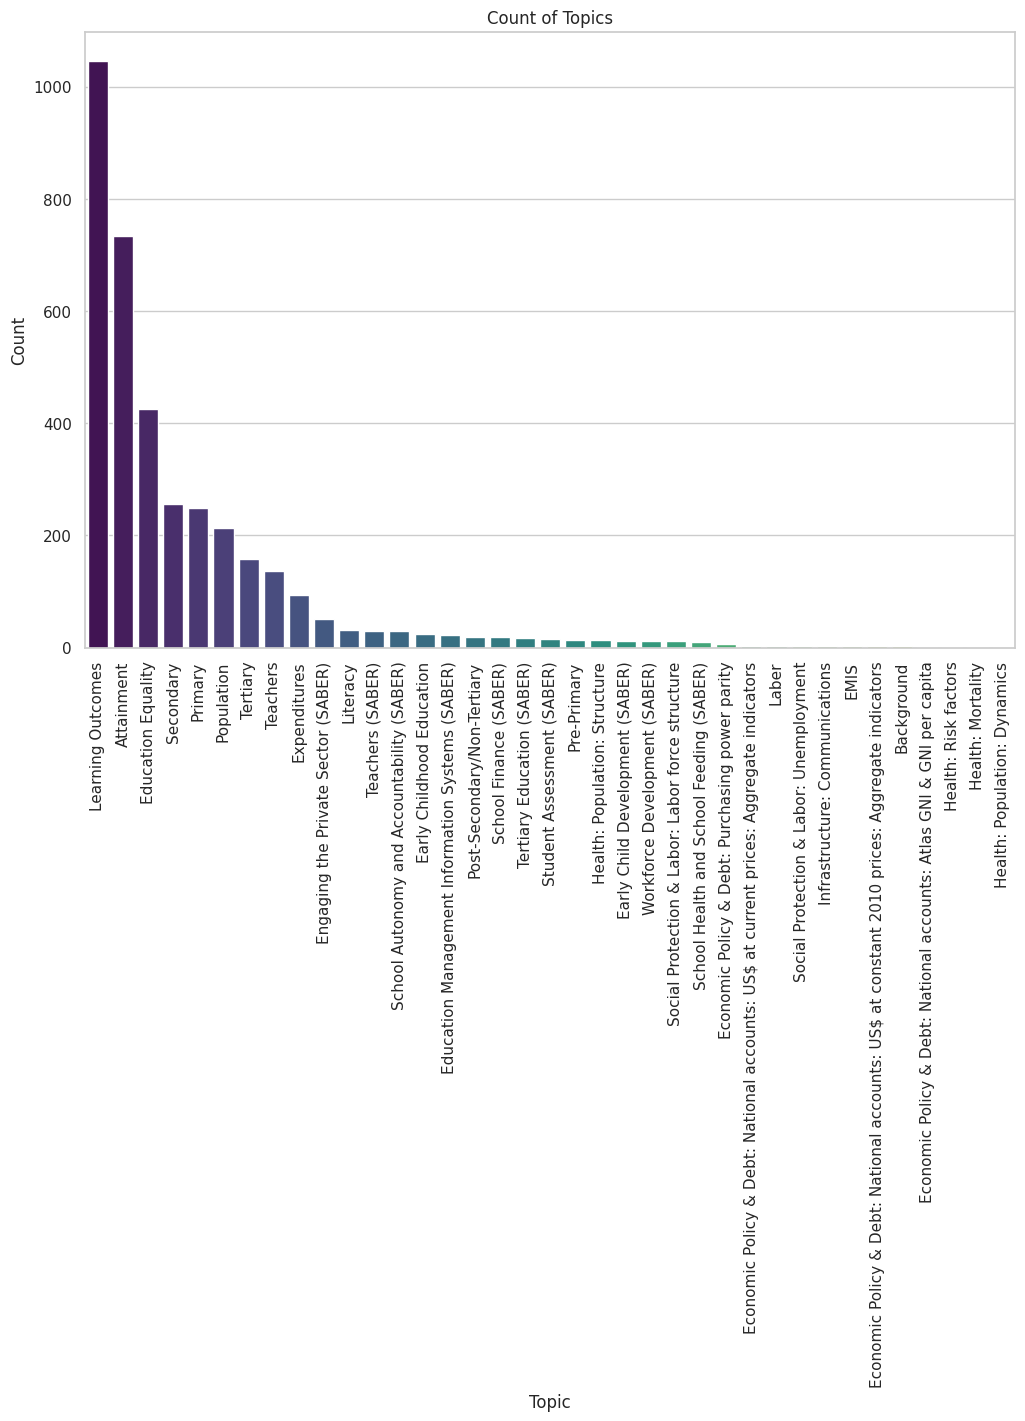

In [ ]:

# Assuming 'Topic' column contains the topics for analysis
topic_counts = EdStatsSeries_df['Topic'].value_counts()

# Set plot style
sns.set_style("whitegrid")

# Create a bar plot of topic counts
plt.figure(figsize=(12, 8))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.title("Count of Topics")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


* Above chart displays frequency of topics on which different countries have been assesed broadly.
* Learning Outcomes have been taken into consideration maximum number of time.

([0, 1, 2],
 [Text(0, 0, 'Actual'), Text(1, 0, 'Preliminary'), Text(2, 0, 'Estimate')])

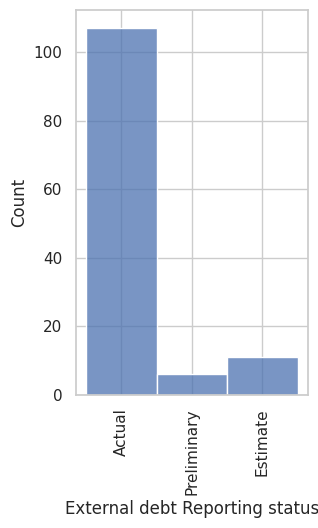

In [ ]:

EdStatsCountry_df[["External debt Reporting status"]].value_counts()

fig = plt.gcf()
fig.set_size_inches(3, 5)

sns.histplot(x="External debt Reporting status",data=EdStatsCountry_df[["External debt Reporting status"]].dropna())

plt.xticks(rotation=90)

##plt.tight_layout()

* Above histogram shows different type of debts used by the countries across globe.

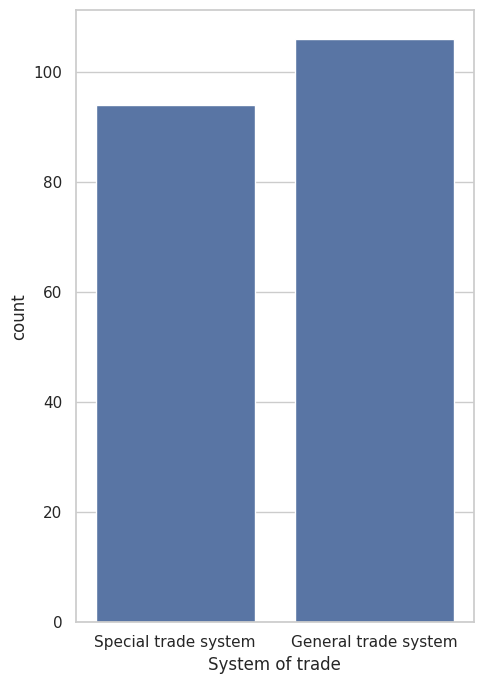

In [ ]:
EdStatsCountry_df[["System of trade"]].dropna()

fig = plt.gcf()
fig.set_size_inches( 5, 7)

sns.countplot(x="System of trade",data=EdStatsCountry_df[["System of trade"]].dropna())

plt.tight_layout()


* Above graph shows count of different type of debt employed by the countries across globe

In [ ]:
# Show the first few rows of the DataFrame
EdStatsCountry_df.groupby(["Income Group"]).count().reset_index()

,Income Group,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,High income: OECD,31,31,31,31,31,31,22,31,31,31,10,31,3,15,31,1,31,31,0,31,31,30,31,4,29,31,30,31,31,31,0
1,High income: nonOECD,44,44,44,44,43,44,15,44,44,37,5,30,7,3,44,4,17,23,0,37,22,23,42,13,7,36,16,15,30,21,0
2,Low income,34,34,34,34,34,34,20,34,34,33,2,33,33,26,34,10,28,31,33,31,26,31,34,34,31,0,19,12,30,34,0
3,Lower middle income,50,50,50,50,49,50,30,50,50,50,8,49,49,14,50,17,34,46,45,47,40,46,50,45,48,14,37,21,44,43,0
4,Upper middle income,55,55,55,55,54,55,33,55,54,54,7,54,52,0,55,15,35,50,46,54,42,51,55,45,45,30,40,28,50,50,0


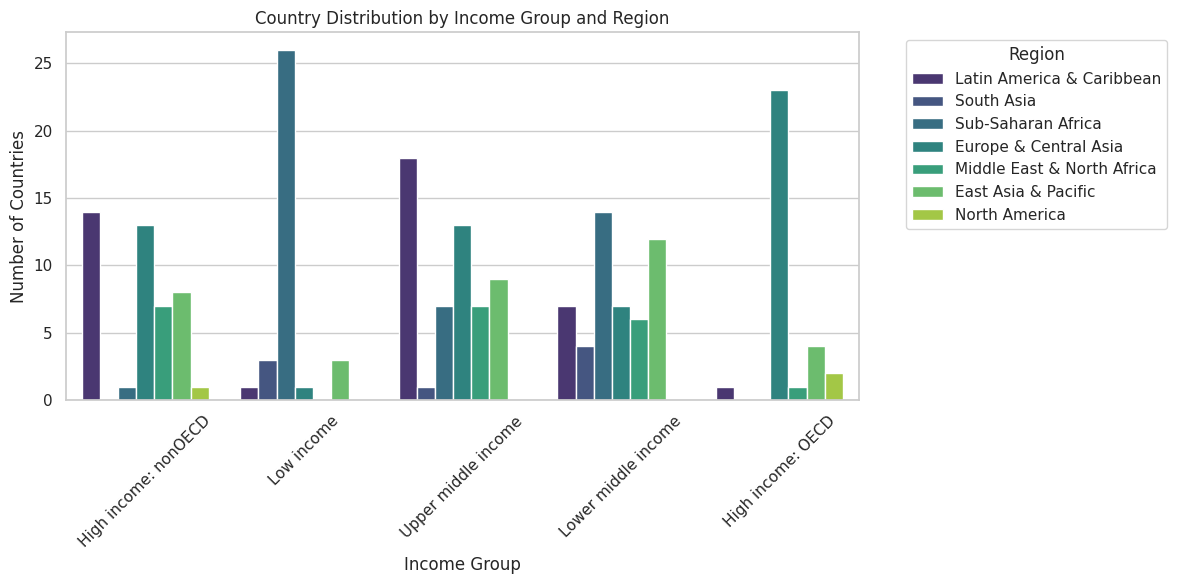

In [ ]:
# Set the visual style
sns.set(style='whitegrid')

# Create a count plot
plt.figure(figsize=(12, 6))
plot = sns.countplot(data=EdStatsCountry_df, x='Income Group', hue='Region',palette="viridis") ##C2CD23

# Customize plot
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.title('Country Distribution by Income Group and Region')
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()


* Above count plot shows the distribution of different income group of countries across region.
* It seems South Asian countries do not belong to high income countries in the data provided.
* Maximum number of low income countries belong to Sub Saharan Africa.
* Maximum number of high income countries belong to Europe.

In [ ]:
# Countries included for below analysis

Countries = ["India", "United States", "United Kingdom", "Australia", "Germany",
             "South Africa", "Canada", "Japan", "Sri Lanka"]

In [ ]:
# Load data from CSV file into DataFrame
# Function to mine a columnwise sub dataset that would have the selected countries as columns with the
# set of meaningful years (those columns/Years that have at least one available value is considered) as rows.
# This type of data is suitable for plotting line charts and get meaningful insights accross the trends it produces.

def get_columnwise_data(indicator_code):
  # Loading the respective data for a particular indicator passed to the function.
  # here it will extract out the data for all available countries, we can narrow
  # it down later to countries we have selected for analysis.
  df = EdStatsData_df[EdStatsData_df["Indicator_Code"] == indicator_code]

  # Data respective to selected set of countries.
  df = df.loc[df['Country_Name'].isin(Countries)]

  # Dropping columns with all 'NaNs'.
  df.dropna(how='all', axis = "columns", inplace=True)

  # Resetting indexes in the data since the previous indexes are now hard to follow up with.
  df.reset_index(inplace = True)

  # Extracting the Indicator Name. It can be used as Title while plotting the visualizations.
  title = df["Indicator_Name"][0]

  # Dropping unnecessary columns, this will help us to only keep meaningful
  # data that adds some value our visualizations.
  df.drop(labels = ["index", "Country_Code", "Indicator_Name", "Indicator_Code"], axis = "columns", inplace = True)

  # Tranposing the dataframe in order to get country-wise columns that
  # holds values across the years for a respective country.
  df = df.T

  # Again after transposing the previous indexes are meaningless because
  # that cannot be used to index elements so we are resetting indexes again.
  df.reset_index(inplace=True)

  # The variable new_columns holds a list of column names for our new dataframe,
  # with first column being "Year" and rest all are country names respectively.
  new_columns = [ "Year", "Australia", "Canada", "Germany", "India", "Japan", "South Africa",
                 "Sri Lanka", "United Kingdom", "United States"]

  # Replacing the column names.
  df=df.set_axis(new_columns,axis=1)

  # Dropping first row since it holds country name column tranposed
  # which is unnecessary at this point.
  df.drop(0, inplace = True)

  # Returning the required dataframe along with title of the Indicator.
  return df, title

In [ ]:
Indicator=EdStatsData_df["Indicator_Name"].unique()

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
print(Indicator)

['Adjusted net enrolment rate, lower secondary, both sexes (%)'
 'Adjusted net enrolment rate, lower secondary, female (%)'
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)'
 'Adjusted net enrolment rate, lower secondary, male (%)'
 'Adjusted net enrolment rate, primary, both sexes (%)'
 'Adjusted net enrolment rate, primary, female (%)'
 'Adjusted net enrolment rate, primary, gender parity index (GPI)'
 'Adjusted net enrolment rate, primary, male (%)'
 'Adjusted net enrolment rate, upper secondary, both sexes (%)'
 'Adjusted net enrolment rate, upper secondary, female (%)'
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)'
 'Adjusted net enrolment rate, upper secondary, male (%)'
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)'
 'Adjusted net intake rate to Grade 1 of primary education, female (%)'
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)'
 'Adjusted net intake rate

In [ ]:
Indicator_Name=["Expenditure on primary as % of government expenditure on education (%)","Expenditure on secondary as % of government expenditure on education (%)"
,"Expenditure on education as % of total government expenditure (%)"]

Indicator_Code_Name=EdStatsData_df[["Indicator_Name","Indicator_Code"]]

Indicator_Code_Name=Indicator_Code_Name[Indicator_Code_Name["Indicator_Name"].isin(Indicator_Name)].reset_index()

Indicator_Code_Name.drop("index",axis=1,inplace=True)


Indicator_Code_Name.drop_duplicates(inplace=True)

Indicators=Indicator_Code_Name["Indicator_Code"].tolist()

print(Indicator_Code_Name)

print(Indicators)

                                      Indicator_Name     Indicator_Code
0  Expenditure on education as % of total governm...  SE.XPD.TOTL.GB.ZS
1  Expenditure on primary as % of government expe...     SE.XPD.PRIM.ZS
2  Expenditure on secondary as % of government ex...     SE.XPD.SECO.ZS
['SE.XPD.TOTL.GB.ZS', 'SE.XPD.PRIM.ZS', 'SE.XPD.SECO.ZS']


In [ ]:
df,title=get_columnwise_data(Indicators[0])

Text(0, 0.5, 'Percentage')

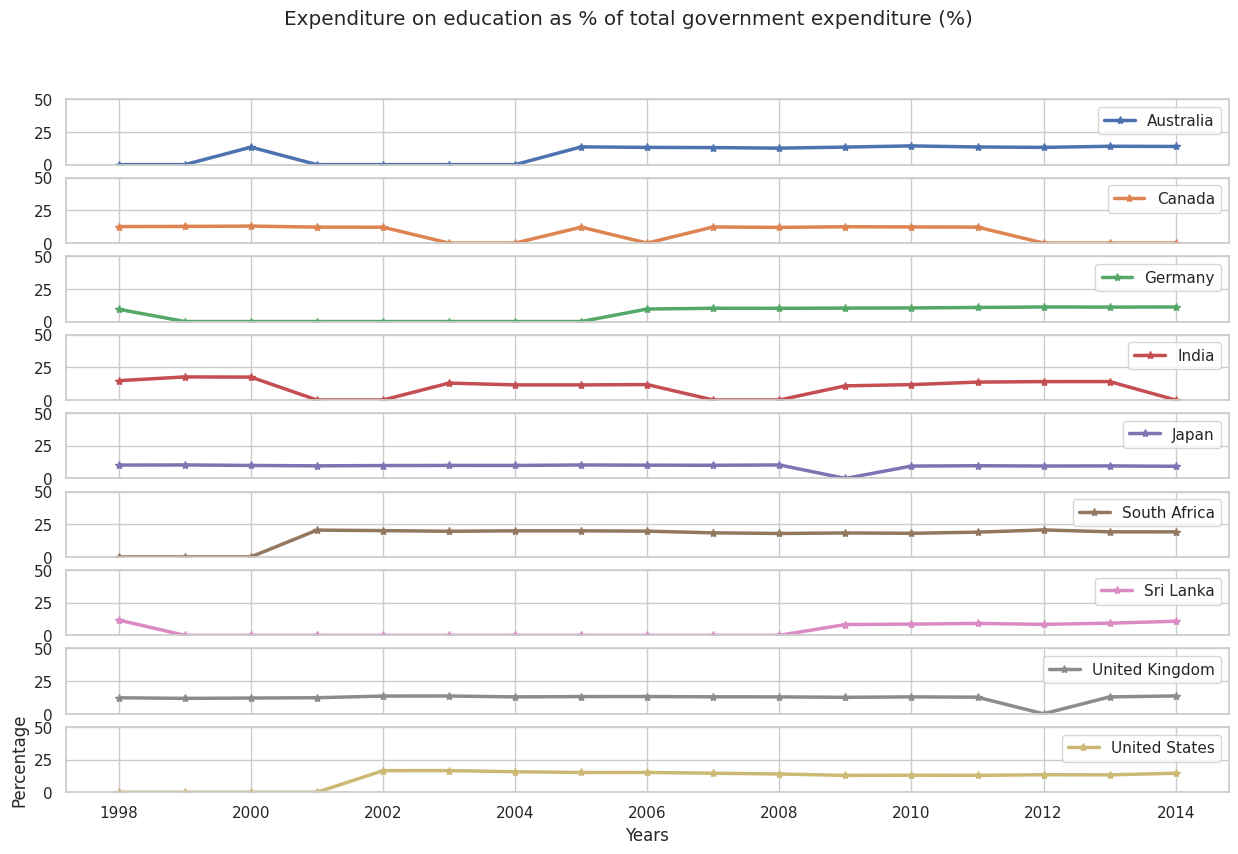

In [ ]:
df = df[:-1]

df=df.apply(pd.to_numeric)

df=df.loc[29:45,:]

df.plot(x = "Year", kind='line', title = title,
                xlabel = "Years",
                ylim = (0, 50),subplots = True, figsize=(15,9), fontsize = 11,
                grid = True, linewidth = 2.5,
                marker = "*")

plt.ylabel("Percentage", rotation=90)









* From the analysis we can conclude that the expenditure on education of India and Sri Lanka decreased in 2014 than that of 1999.
* Reverse pattern can be seen for South Africa, their expenditure is increased to approx 18%.
* United States and United Kingdom are consistently devloping well over the years.
* Also for countries like Japan and Germany the government expenditure is getting reduced as years go by.
* Whereas of Australia and Canada shows positive signs of growth.

In [ ]:
df.head()

,Year,Australia,Canada,Germany,India,Japan,South Africa,Sri Lanka,United Kingdom,United States
29,1998,0.00000,12.63958,9.33901,14.77775,10.20680,0.000000,11.66883,12.24976,0.000000
30,1999,0.00000,12.74188,0.00000,17.64341,10.33425,0.000000,0.00000,11.79452,0.000000
31,2000,13.36016,12.98260,0.00000,17.49650,9.93041,0.000000,0.00000,12.05231,0.000000
32,2001,0.00000,12.21224,0.00000,0.00000,9.63897,20.472050,0.00000,12.28360,0.000000
33,2002,0.00000,12.14790,0.00000,0.00000,9.85811,20.095699,0.00000,13.55467,16.526211


## Conclusion

From the above analysis,we have conclude the following point.

* India has the highest number of male population in last grade of primary education.
* India's GDP in 2005 was close to Canada.India GDP growth has leapfrogged since 2005.
* Number of male population in last grade of primary education has positive trend between years 1990 and 2000
* After India,US has highest number of male population in last grade of primary education.
* We have seen less drop out rate in 5 grade in high income country New Zealand compared to middle income countries like Chile,Panama.
* We have also seen distribution of different income group countries in different geographies.
* We have also seen there is a decline in government expenditure on education after 2014 despite strong GDP growth.